In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import klib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Umbilical_cord.csv')

In [3]:
df

,V1,V2,V3,V4,V5,class
0,0.445238,0.505075,-0.820383,0.995991,0.032069,1
1,0.498504,0.439431,-0.542831,0.931170,0.550642,1
2,0.510062,0.439431,-0.542831,0.931170,0.550642,1
3,0.239149,0.463595,-0.744533,0.997584,0.019329,1
4,0.348374,0.464238,-0.599760,0.951383,0.388940,1
...,...,...,...,...,...,...
146,0.640631,0.548613,-0.585006,0.950092,0.399267,3
147,0.738230,NaN,-0.592338,0.950737,0.394103,3
148,0.640631,0.448613,-0.585006,0.950092,0.399267,3
149,0.838230,0.449279,-0.592338,NaN,0.394103,3


## **Data Analysis**

In [4]:
df.head()

,V1,V2,V3,V4,V5,class
0,0.445238,0.505075,-0.820383,0.995991,0.032069,1
1,0.498504,0.439431,-0.542831,0.931170,0.550642,1
2,0.510062,0.439431,-0.542831,0.931170,0.550642,1
3,0.239149,0.463595,-0.744533,0.997584,0.019329,1
4,0.348374,0.464238,-0.599760,0.951383,0.388940,1


In [5]:
df.tail()

,V1,V2,V3,V4,V5,class
146,0.640631,0.548613,-0.585006,0.950092,0.399267,3
147,0.738230,NaN,-0.592338,0.950737,0.394103,3
148,0.640631,0.448613,-0.585006,0.950092,0.399267,3
149,0.838230,0.449279,-0.592338,NaN,0.394103,3
150,0.395254,0.529118,-0.499564,0.917122,0.513023,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      150 non-null    float64
 1   V2      137 non-null    float64
 2   V3      149 non-null    float64
 3   V4      139 non-null    float64
 4   V5      150 non-null    float64
 5   class   151 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


In [7]:
df.describe()

,V1,V2,V3,V4,V5,class
count,150.000000,137.000000,149.000000,139.000000,150.000000,151.000000
mean,0.338273,0.496872,-0.722455,0.972831,0.221039,1.344371
std,0.151900,0.058576,0.124096,0.019652,0.154744,0.589309
min,0.105265,0.415673,-0.892557,0.909939,0.018468,1.000000
25%,0.239297,0.466318,-0.817893,0.964420,0.117814,1.000000
50%,0.325238,0.484382,-0.756827,0.980293,0.159195,1.000000
75%,0.422891,0.511126,-0.625878,0.985404,0.304688,2.000000
max,0.957631,0.849507,-0.224390,0.997692,0.720484,3.000000


In [8]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
class      int64
dtype: object

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col,                                    # Feature
                      df[col].dtype,                          # Data_type
                      df[col].isna().sum(),                   # Null_num
                      100*df[col].isna().sum()/len(df[col]),  # Null_pct
                      df[col].unique(),                       # Unique_num
                      df[col].unique()[:4]])                  # Unique_sample
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split()) 
desc_df

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,V1,float64,1,0.662252,"[0.445238462, 0.498503907, 0.510062189, 0.2391...","[0.445238462, 0.498503907, 0.510062189, 0.2391..."
1,V2,float64,14,9.271523,"[0.505075484, 0.439430528, 0.463595125, 0.4642...","[0.505075484, 0.439430528, 0.463595125, 0.4642..."
2,V3,float64,2,1.324503,"[-0.820383398, -0.542830517, -0.744533353, -0....","[-0.820383398, -0.542830517, -0.744533353, -0...."
3,V4,float64,12,7.947020,"[0.995991373, 0.931169794, 0.997583871, 0.9513...","[0.995991373, 0.931169794, 0.997583871, 0.9513..."
4,V5,float64,1,0.662252,"[0.032069017, 0.55064165, 0.019329032, 0.38893...","[0.032069017, 0.55064165, 0.019329032, 0.38893..."
5,class,int64,0,0.000000,"[1, 2, 3]","[1, 2, 3]"


## **Data Preprocessing**

### Missing Value

In [10]:
df.isna().sum()

V1        1
V2       14
V3        2
V4       12
V5        1
class     0
dtype: int64

In [11]:
# Impute menggunakan nilai median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [12]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
class    0
dtype: int64

In [13]:
df

,V1,V2,V3,V4,V5,class
0,0.445238,0.505075,-0.820383,0.995991,0.032069,1
1,0.498504,0.439431,-0.542831,0.931170,0.550642,1
2,0.510062,0.439431,-0.542831,0.931170,0.550642,1
3,0.239149,0.463595,-0.744533,0.997584,0.019329,1
4,0.348374,0.464238,-0.599760,0.951383,0.388940,1
...,...,...,...,...,...,...
146,0.640631,0.548613,-0.585006,0.950092,0.399267,3
147,0.738230,0.484382,-0.592338,0.950737,0.394103,3
148,0.640631,0.448613,-0.585006,0.950092,0.399267,3
149,0.838230,0.449279,-0.592338,0.980293,0.394103,3


### Divide into independent and dependent variables

In [14]:
X = df.iloc[:, :-1]
y = df['class']

### Analisis Korelasi Fitur

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

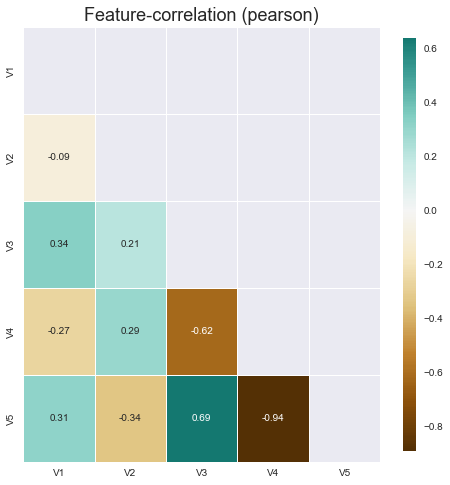

In [15]:
# Korelasi pada data yang belum dilakukan categorical encoding
klib.corr_plot(X, annot=True, figsize=(8,8))

### Outlier Detection

In [16]:
X = X.values
iso = IsolationForest(contamination=0.1)
iso_yhat = iso.fit_predict(X)

In [17]:
mask = iso_yhat != -1
X, y = X[mask, :], y[mask]

### Train Test Split

In [18]:
# Train test split untuk data sebelum outlier detection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train.shape

(108, 5)

## **Modelling - Naive Bayes**

In [20]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## **Testing**

In [21]:
y_pred = nb.predict(X_test)
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.7857142857142857


## **Discussion**

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(f'Precision = {precision_score(y_test, y_pred, average=None)}')
print(f'Recall = {recall_score(y_test, y_pred, average=None)}')

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

Precision = [0.88888889 0.75       0.        ]
Recall = [0.8        0.85714286 0.        ]


In [23]:
target_names = ['1', '2', '3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        20
           2       0.75      0.86      0.80         7
           3       0.00      0.00      0.00         1

    accuracy                           0.79        28
   macro avg       0.55      0.55      0.55        28
weighted avg       0.82      0.79      0.80        28



<AxesSubplot:>

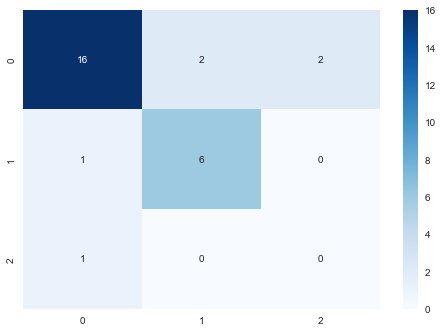

In [24]:
sns.heatmap(cm, annot=True, cmap='Blues')